# Project : NO Churn Telecom

## Project Code : PRCL-0017

### Client: No-Churn Telecom
### Category: Telecom – Churn Rate ML
### Project Ref: PM-PR-0017


Business Case: No-Churn Telecom No-Churn Telecom, an established telecom operator in Europe, faces increased competition, resulting in a churn rate exceeding 10%. Despite efforts like tariff reductions and promotional offers, customer retention remains challenging.

Project Goal: Leverage Machine Learning to:

Identify Key Drivers of Churn: Understand variables influencing customer migration. Create Churn Risk Scores: Enable targeted retention campaigns. Predict and Address Churn: Introduce a "CHURN-FLAG" variable (YES(1)/NO(0)) to identify high-risk customers and prioritize their support for improved retention. This initiative aims to enhance customer experience and maintain No-Churn Telecom’s competitive edge in the market.

Streamlining Data Cleaning: From Raw SQL Export to Structured Dataset: The data cleaning process began with exporting raw data from SQL in CSV format. However, the CSV file presented multiple issues, such as inconsistent data types, missing values, and special character encoding problems. Directly loading this data into Python caused errors and unreliable behavior. To resolve this, we adopted a structured approach:

Loaded the Raw CSV File: Handled encoding and delimiter inconsistencies using pandas. Data Cleaning in Python: Addressed key issues by: Standardizing column names. Converting date columns to proper formats. Filling missing values with defaults or calculated values. Removing special characters from text fields. Saved the Cleaned Data to Excel: Exported the refined dataset to an Excel file for improved structure, formatting, and easy validation. This combined approach of using Python for automation and Excel for structured output ensured the dataset was consistent, reliable, and ready for analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score

In [2]:
# Step 1: Load the dataset
data = pd.read_csv(r"C:\Users\prajw\OneDrive\Desktop\no churn data.csv")

data.head is used to display the first ten rows of the dataframe.

In [3]:
data.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# Manually assign column names
data.columns = [
    "State", "Account_Length", "Area_Code", "Phone", "International_Plan",
    "VMail_Plan", "VMail_Message", "Day_Mins", "Day_Calls", "Day_Charge",
    "Eve_Mins", "Eve_Calls", "Eve_Charge", "Night_Mins", "Night_Calls", "Night_Charge",
    "International_Mins", "International_Calls", "International_Charge", "CustServ_Calls", "Churn"
]

In [5]:
data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
# Display Maximum rows and columns
pd.set_option('display.max_columns', None)

In [7]:
import warnings
warnings.filterwarnings("ignore")  # Ignores all warnings

In [8]:
data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

Here, the data type of the area code is initially int. But, we are changing the data type of area code column to object as area code should be unique.
Then, we are converting churn column data type into int.

In [10]:
print(data['Churn'].unique()) # we have  space and . so we will clean it to convert it to binary numbers

[' False.' ' True.']


In [11]:
data['Churn'] = data['Churn'].astype(str).str.strip().str.replace('.', '', regex=False)

In [12]:
data['Churn'] = data['Churn'].map({'False': 0, 'True': 1}).astype(int)

In [13]:
print(data['Churn'].unique())

[0 1]


In [14]:
data.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035,0.142084
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019,0.349174
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [15]:
data.describe(include='O')

,State,Phone,International_Plan,VMail_Plan
count,4617,4617,4617,4617
unique,51,4617,2,2
top,WV,382-4657,no,no
freq,149,1,4171,3381


Here, we are dropping the phone number column as the phone number for each user is unique and is not relevant for our analysis on the churn.

In [16]:
data.drop(['Phone'], axis=1)

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
4613,NM,177,408,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,VT,67,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0
4615,MI,98,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


# Data Cleaning

By using data.isnull().sum(), we are checking for any null values in the dataframe. From this, we can observe that there are no null values present in the dataframe.

In [17]:
data.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
Phone                   0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_Calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

# EDA

We are using value_counts() to find out the count for each unique value in the churn. We can observe that the rate of people who are trying to churn is less.

In [18]:
data.Churn.value_counts()

Churn
0    3961
1     656
Name: count, dtype: int64

In [19]:
churn_percentage = data["Churn"].sum() * 100 / data["Churn"].shape[0]
print("Churn percentage is %.3f%%." % churn_percentage)

Churn percentage is 14.208%.


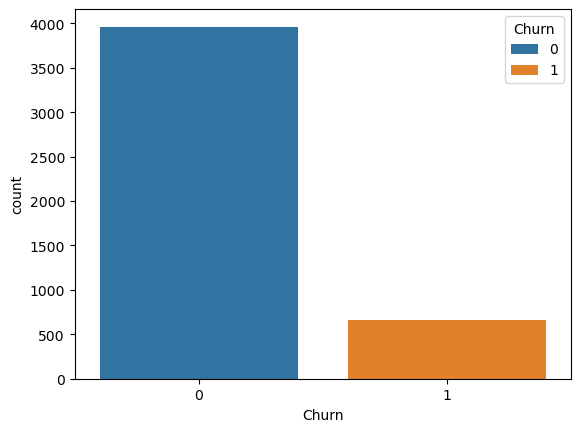

In [20]:
a=sns.countplot(x='Churn',hue = 'Churn',data=data)

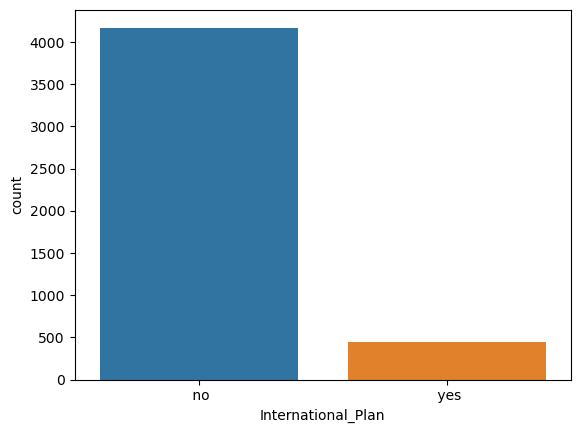

In [21]:
a=sns.countplot(x='International_Plan',hue = 'International_Plan',data=data)

In [22]:
# Automatically detect numerical columns and categorical columns
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [23]:
numerical_cols

Index(['Account_Length', 'Area_Code', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'International_Mins',
       'International_Calls', 'International_Charge', 'CustServ_Calls'],
      dtype='object')

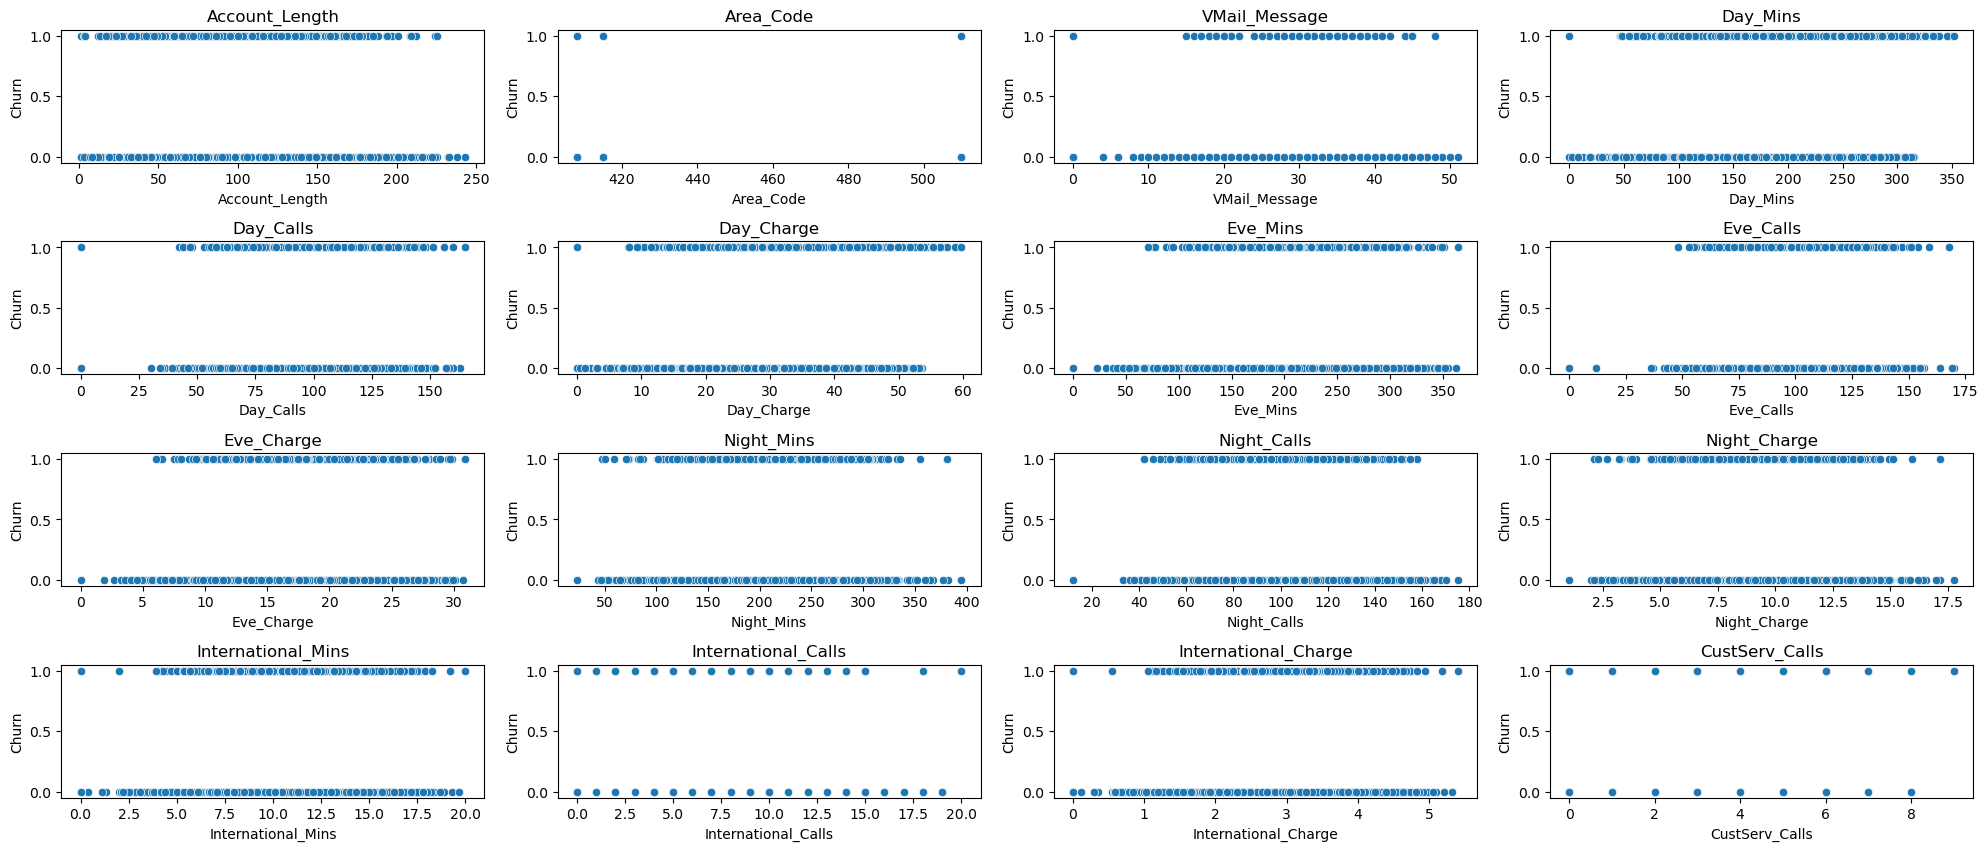

In [24]:
#scatter plot for numerical columns
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in numerical_cols:
    plt.subplot(11,4,plotnum)
    sns.scatterplot(x=data[i],y=data['Churn'])
    plt.title(i)
    plotnum+=1
plt.tight_layout()
plt.show()

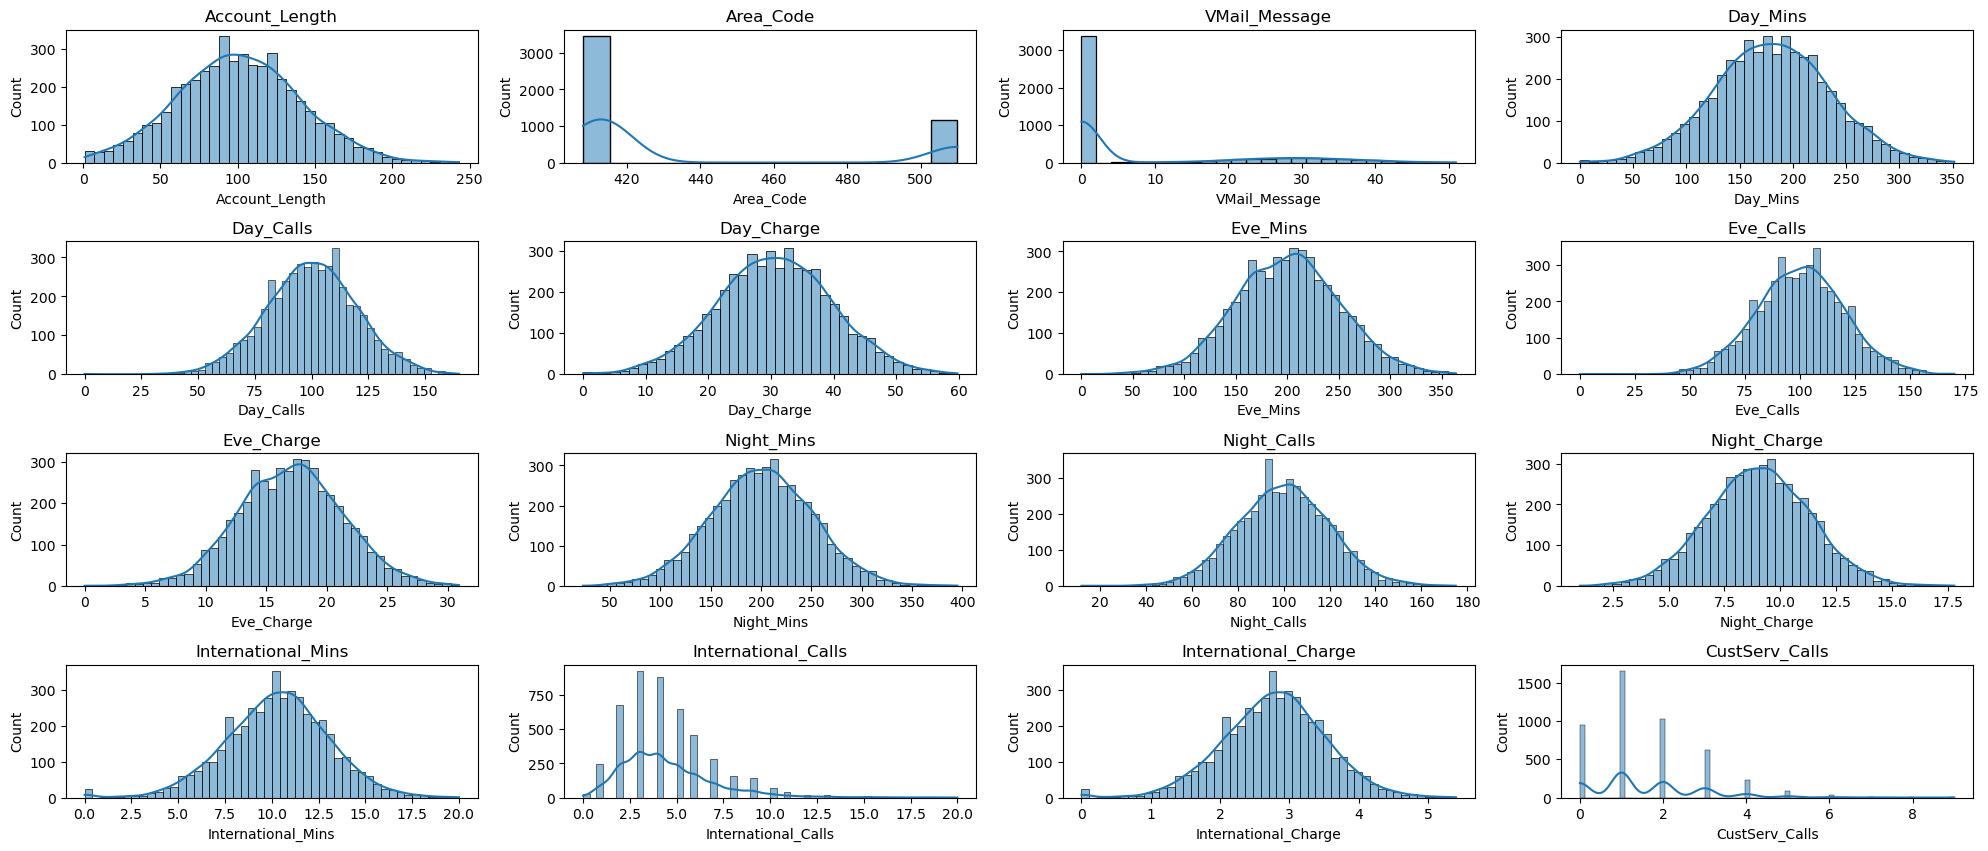

In [25]:
# histplot for numerical values using subplot
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in numerical_cols:
    plt.subplot(11,4,plotnum)
    sns.histplot(x=data[i],kde=True)
    plt.title(i)
    plotnum+=1
plt.tight_layout()
plt.show()

# Handling Outliers

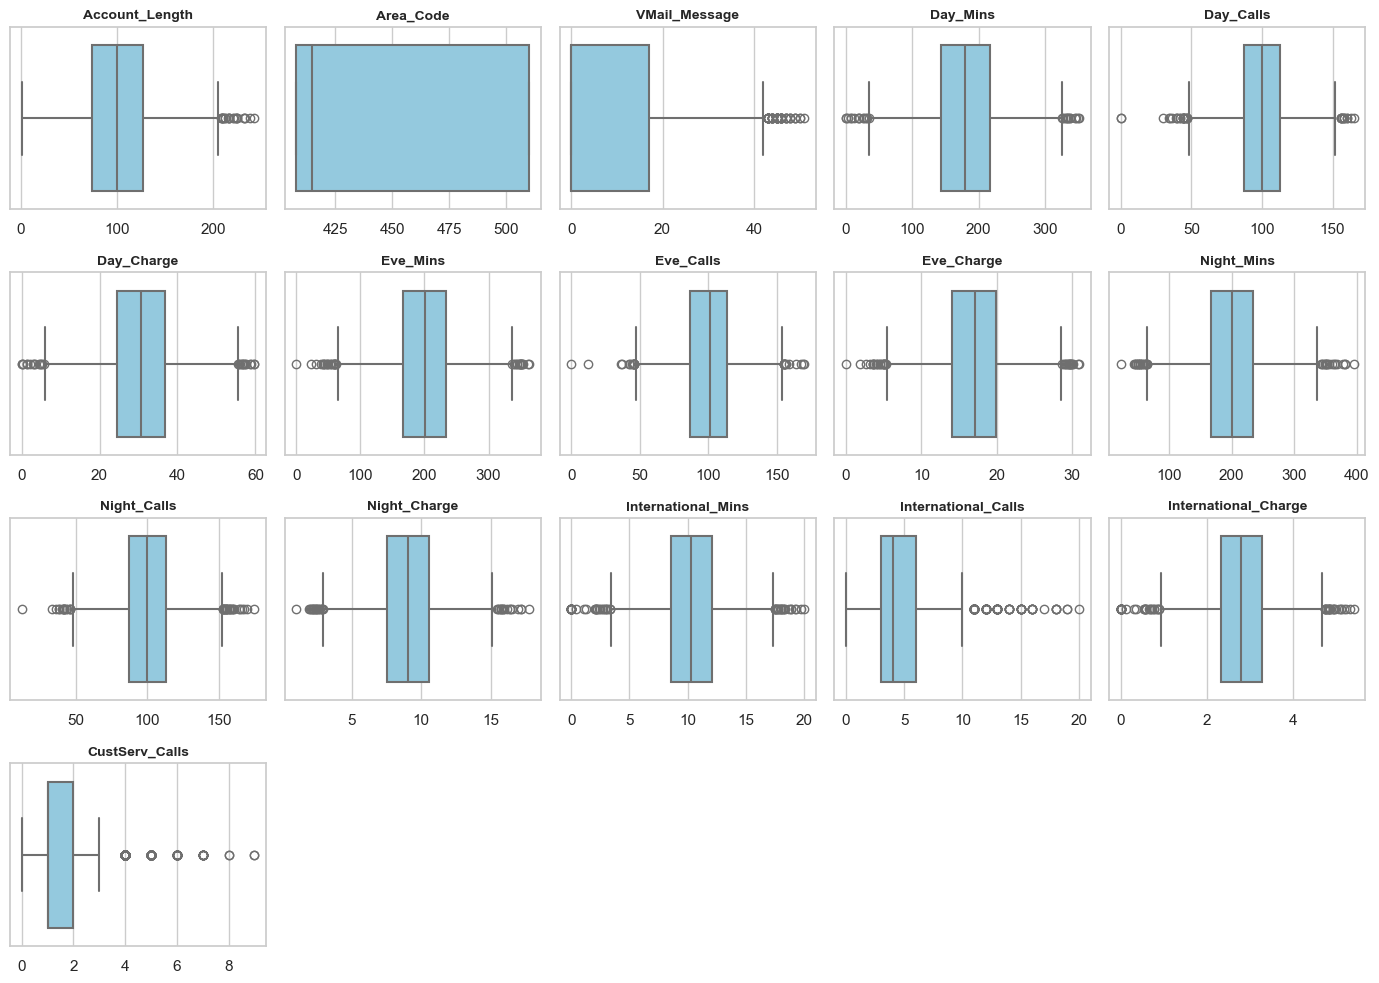

In [26]:
# Set a different style and color palette
sns.set_theme(style="whitegrid")  # You can try "darkgrid", "ticks", "white", etc.
sns.set_palette("pastel")  # Options: "deep", "muted", "bright", "dark", etc.

plt.figure(figsize=(14, 10))  # Adjust figure size
for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=data, x=column, color="skyblue", linewidth=1.5)  # Customize color and line width
    plt.title(column, fontsize=10, weight='bold')  # Adjust title font size and weight
    plt.xlabel("")  # Remove x-axis label for cleaner visualization
    plt.ylabel("")  # Remove y-axis label for cleaner visualization

plt.tight_layout()
plt.show()

In [27]:
import numpy as np

# Define lower and upper bounds using the 1st and 99th percentiles
lower_bounds = data[numerical_cols].quantile(0.01)
upper_bounds = data[numerical_cols].quantile(0.99)

# Loop through each numerical column and replace outliers
for col in numerical_cols:
    skewness = data[col].skew()  # Compute skewness
    replacement_value = data[col].mean() if abs(skewness) < 0.5 else data[col].median()  # Choose mean or median

    # Replace lower outliers
    data.loc[data[col] < lower_bounds[col], col] = replacement_value
    
    # Replace upper outliers
    data.loc[data[col] > upper_bounds[col], col] = replacement_value

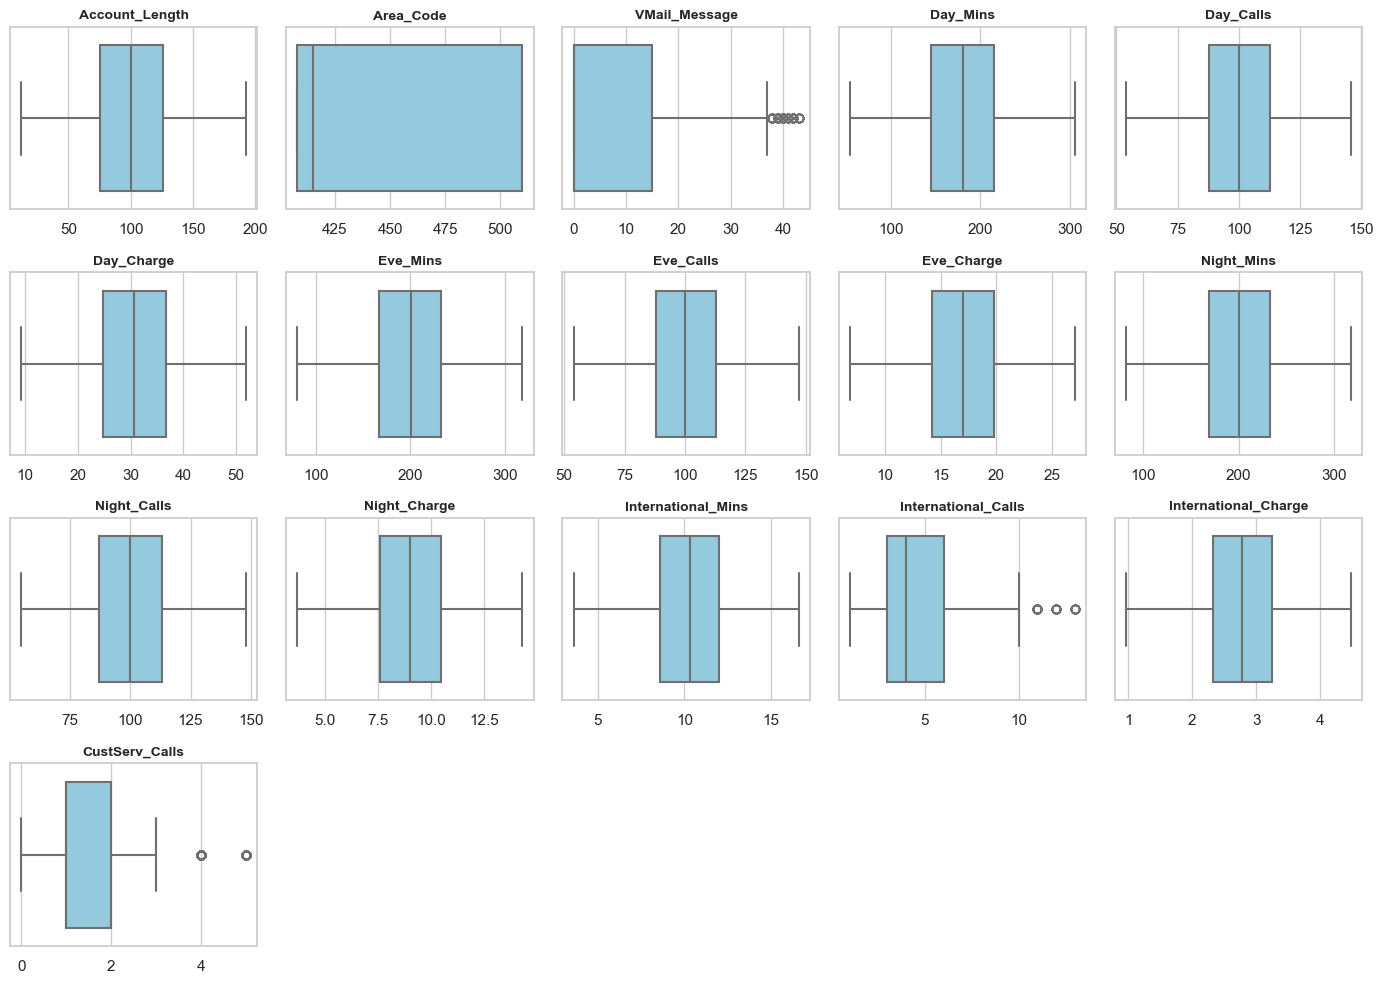

In [28]:
# Set a different style and color palette
sns.set_theme(style="whitegrid")  # You can try "darkgrid", "ticks", "white", etc.
sns.set_palette("pastel")  # Options: "deep", "muted", "bright", "dark", etc.

plt.figure(figsize=(14, 10))  # Adjust figure size
for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=data, x=column, color="skyblue", linewidth=1.5)  # Customize color and line width
    plt.title(column, fontsize=10, weight='bold')  # Adjust title font size and weight
    plt.xlabel("")  # Remove x-axis label for cleaner visualization
    plt.ylabel("")  # Remove y-axis label for cleaner visualization

plt.tight_layout()
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   float64
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   float64
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   float64
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   float64
 15  Night_Charge         

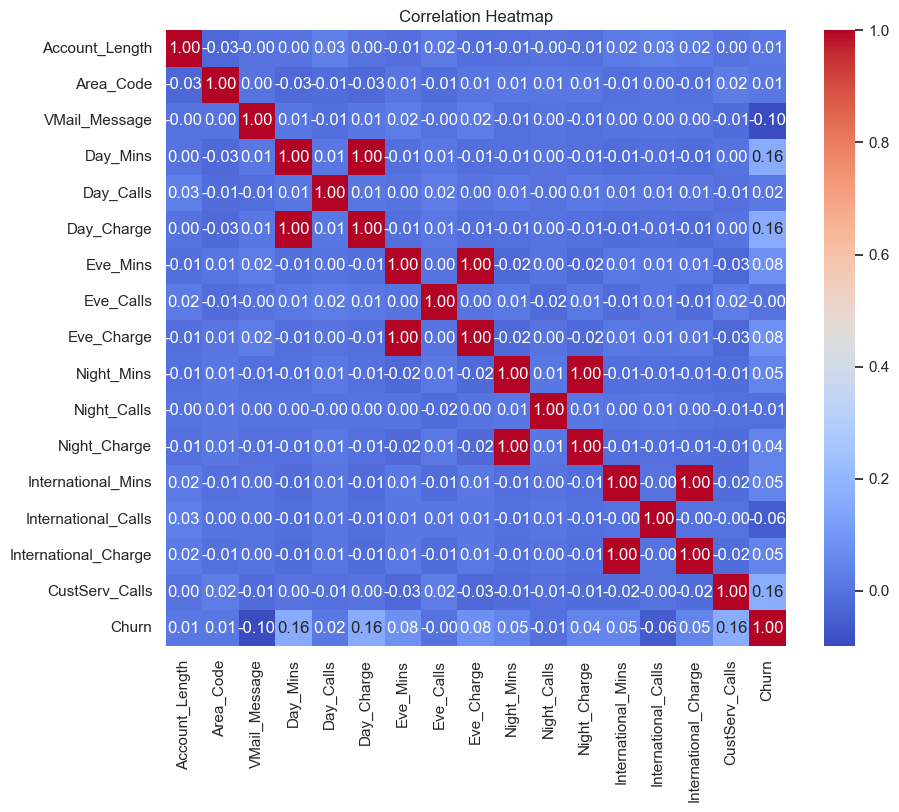

In [30]:
non_numeric_columns = data.select_dtypes(include=['object']).columns
df_numeric = data.drop(non_numeric_columns, axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Encoding 

In [31]:
data.describe(include='O')

,State,Phone,International_Plan,VMail_Plan
count,4617,4617,4617,4617
unique,51,4617,2,2
top,WV,382-4657,no,no
freq,149,1,4171,3381


In [32]:
data.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [33]:
data.drop(['Phone', 'State'], axis=1, inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Account_Length        4617 non-null   float64
 1   Area_Code             4617 non-null   int64  
 2   International_Plan    4617 non-null   object 
 3   VMail_Plan            4617 non-null   object 
 4   VMail_Message         4617 non-null   int64  
 5   Day_Mins              4617 non-null   float64
 6   Day_Calls             4617 non-null   float64
 7   Day_Charge            4617 non-null   float64
 8   Eve_Mins              4617 non-null   float64
 9   Eve_Calls             4617 non-null   float64
 10  Eve_Charge            4617 non-null   float64
 11  Night_Mins            4617 non-null   float64
 12  Night_Calls           4617 non-null   float64
 13  Night_Charge          4617 non-null   float64
 14  International_Mins    4617 non-null   float64
 15  International_Calls  

In [35]:
data.International_Plan.unique()

array([' no', ' yes'], dtype=object)

In [36]:
data.VMail_Plan.unique()

array([' yes', ' no'], dtype=object)

In [37]:
binary_cols = ['International_Plan', 'VMail_Plan']  
for col in binary_cols:
    data[col] = data[col].map({' yes': 1, ' no': 0})

In [38]:
data.head()

,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,128.0,415,0,1,25,265.1,110.0,45.07,197.400000,99.0,16.780000,244.7,91.0,11.01,10.0,3,2.70,1,0
1,107.0,415,0,1,26,161.6,123.0,27.47,195.500000,103.0,16.620000,254.4,103.0,11.45,13.7,3,3.70,1,0
2,137.0,415,0,0,0,243.4,114.0,41.38,121.200000,110.0,10.300000,162.6,104.0,7.32,12.2,5,3.29,0,0
3,84.0,408,1,0,0,299.4,71.0,50.90,200.429088,88.0,17.036703,196.9,89.0,8.86,6.6,7,1.78,2,0
4,75.0,415,1,0,0,166.7,113.0,28.34,148.300000,122.0,12.610000,186.9,121.0,8.41,10.1,3,2.73,3,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Account_Length        4617 non-null   float64
 1   Area_Code             4617 non-null   int64  
 2   International_Plan    4617 non-null   int64  
 3   VMail_Plan            4617 non-null   int64  
 4   VMail_Message         4617 non-null   int64  
 5   Day_Mins              4617 non-null   float64
 6   Day_Calls             4617 non-null   float64
 7   Day_Charge            4617 non-null   float64
 8   Eve_Mins              4617 non-null   float64
 9   Eve_Calls             4617 non-null   float64
 10  Eve_Charge            4617 non-null   float64
 11  Night_Mins            4617 non-null   float64
 12  Night_Calls           4617 non-null   float64
 13  Night_Charge          4617 non-null   float64
 14  International_Mins    4617 non-null   float64
 15  International_Calls  

In [40]:
from sklearn.preprocessing import StandardScaler

# Select all numerical columns except 'Churn'
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Apply StandardScaler only to selected columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [41]:
data.head()

,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,0.747164,-0.521392,-0.327000,1.653916,1.333072,1.692334,0.537038,1.692636,-0.065357,-0.062733,-0.065162,0.945764,-0.485652,0.943793,-0.119727,-0.611073,-0.120514,-0.424242,0
1,0.177642,-0.521392,-0.327000,1.653916,1.409115,-0.376301,1.243153,-0.376606,-0.106077,0.155162,-0.105504,1.153855,0.164684,1.153404,1.363230,-0.611073,1.364066,-0.424242,0
2,0.991245,-0.521392,-0.327000,-0.604626,-0.568011,1.258620,0.754304,1.258801,-1.698419,0.536479,-1.698986,-0.815493,0.218879,-0.814088,0.762031,0.275300,0.755388,-1.250707,0
3,-0.446120,-0.686941,3.058107,-0.604626,-0.568011,2.377881,-1.581305,2.378073,-0.000440,-0.661944,-0.000439,-0.079669,-0.594042,-0.080447,-1.482445,1.161672,-1.486328,0.402224,0
4,-0.690201,-0.521392,3.058107,-0.604626,-0.568011,-0.274369,0.699988,-0.274319,-1.117632,1.190164,-1.116558,-0.294195,1.140189,-0.294823,-0.079647,-0.611073,-0.075977,1.228690,0


In [42]:
x = data.drop('Churn',axis=1)
y = data['Churn']

In [43]:
## Splitting X and Y dataframes into train, test sets using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

# Logistic Regression model:

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
LR = LogisticRegression(class_weight = 'balanced', random_state=42)
LR.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [46]:
Y_lr = LR.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,f1_score

In [48]:
#testing accuracy
Y_pred_prob = accuracy_score(y_test,Y_lr)
Y_pred_prob

0.7294372294372294

In [49]:
#training accuracy
Y_tlr = LR.predict(x_train) # predict the data
t1 = accuracy_score(y_train,Y_tlr)
t1

0.748065614360879

In [50]:
f1 = f1_score(y_test,Y_lr,average="weighted")
f1

0.7676317947487257

In [51]:
r1 = recall_score(y_test,Y_lr,average="weighted")
r1

0.7294372294372294

In [52]:
p1 = precision_score(y_test,Y_lr,average="weighted")
p1

0.8564552270199383

In [53]:
print(classification_report(y_test,Y_lr))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82      1190
           1       0.31      0.75      0.44       196

    accuracy                           0.73      1386
   macro avg       0.63      0.74      0.63      1386
weighted avg       0.86      0.73      0.77      1386



# K-Nearest Neighbour

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()

In [56]:
## Calculate optimum value of K 
Error=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    Error.append(accuracy_score(pred_i,y_test))

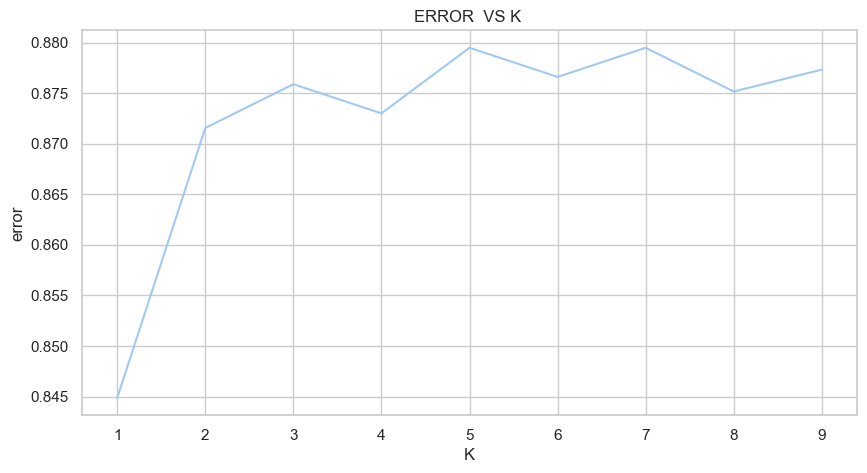

In [57]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),Error,markersize = 10)
plt.title("ERROR  VS K ")
plt.ylabel('error')
plt.xlabel('K')
plt.show()

Plot shows optimum value of K is 1.

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
knn_Train_pred=knn.predict(x_train)

In [61]:
# Classification report of training
print(classification_report(y_train,knn_Train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2771
           1       1.00      1.00      1.00       460

    accuracy                           1.00      3231
   macro avg       1.00      1.00      1.00      3231
weighted avg       1.00      1.00      1.00      3231



In [62]:
knn_Test_pred=knn.predict(x_test)

In [63]:
print(classification_report(y_test,knn_Test_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1190
           1       0.44      0.37      0.40       196

    accuracy                           0.84      1386
   macro avg       0.67      0.65      0.66      1386
weighted avg       0.83      0.84      0.84      1386



OverFitting, KNN classifer gives 100% accuarcy when applied on training data and drop in accuracy about 14% is observed when applied on testing data. The problem of overfititng of data is observed in this scenario. 

Overfitting is not the only problem over here. Class imbalance, hyper parameters tuning are also affecting the performance of model when applied testing data.

We can observe there are only 656 rows with churn variable as True where as we have 3961 rows with churn as False. This huge difference makes model poor while predicting new variables with True churn though it's predicting 100% for True churn on training data. Hyper parameter tuning would effect predicitons on training data whcih results in predictions on training data closer to that of testing data.

## RandomForest

Using class_weight and few other parameters considering the performance of KNN model.

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
RFclf = RandomForestClassifier(n_estimators=300,max_depth=7,min_samples_leaf=5,class_weight='balanced',random_state=42)

In [66]:
RFclf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       n_estimators=300, random_state=42)

In [67]:
RFclf_Train_pred=RFclf.predict(x_train)

In [68]:
print(classification_report(y_train,RFclf_Train_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2771
           1       0.85      0.75      0.79       460

    accuracy                           0.94      3231
   macro avg       0.90      0.86      0.88      3231
weighted avg       0.94      0.94      0.94      3231



As expected parameter tuning has worked. Random forest classifier with out parameters have resulted in 100% training accuracy. Classifier with tuned parameters have reduced performance of training data let's see whether it helps in improving acuuracy of test data.

In [69]:
RFclf_Test_pred=RFclf.predict(x_test)

In [70]:
print(classification_report(y_test,RFclf_Test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1190
           1       0.79      0.73      0.76       196

    accuracy                           0.93      1386
   macro avg       0.87      0.85      0.86      1386
weighted avg       0.93      0.93      0.93      1386



By far RandomForest classifier on the normalized data is the best accuracy we have got. This classifier gives 94% prediction acuuracy on the training data and 93% prediction accuracy on testing data.

In [71]:
print('f1-score of LogisticRegression Model',classification_report(y_test,Y_lr))
print('f1-score of KNN Model',classification_report(y_test,knn_Test_pred))
print('f1-score of RandomForest Model',classification_report(y_test,RFclf_Test_pred))

f1-score of LogisticRegression Model               precision    recall  f1-score   support

           0       0.95      0.73      0.82      1190
           1       0.31      0.75      0.44       196

    accuracy                           0.73      1386
   macro avg       0.63      0.74      0.63      1386
weighted avg       0.86      0.73      0.77      1386

f1-score of KNN Model               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1190
           1       0.44      0.37      0.40       196

    accuracy                           0.84      1386
   macro avg       0.67      0.65      0.66      1386
weighted avg       0.83      0.84      0.84      1386

f1-score of RandomForest Model               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1190
           1       0.79      0.73      0.76       196

    accuracy                           0.93      1386
   macro avg       0.87      0.85     

# Clustering
Finding similarities by clustering Columns like state, area code and phone number which are not used in model bulding in previous models will help and train model to learn  from those similarities. Using K_Means clustering to cluster 3 unique identification columns.

In [72]:
data1 = pd.read_csv(r"C:\Users\prajw\OneDrive\Desktop\no churn data.csv")

In [73]:
# Manually assign column names
data1.columns = [
    "State", "Account_Length", "Area_Code", "Phone", "International_Plan",
    "VMail_Plan", "VMail_Message", "Day_Mins", "Day_Calls", "Day_Charge",
    "Eve_Mins", "Eve_Calls", "Eve_Charge", "Night_Mins", "Night_Calls", "Night_Charge",
    "International_Mins", "International_Calls", "International_Charge", "CustServ_Calls", "Churn"
]

In [74]:
 df2=data1[['State','Area_Code', 'Phone']] ## creating a dataframe with those three columns.

In [75]:
df2.head()

,State,Area_Code,Phone
0,KS,415,382-4657
1,OH,415,371-7191
2,NJ,415,358-1921
3,OH,408,375-9999
4,OK,415,330-6626


In [76]:
df3=df2.groupby(['Area_Code','State']).agg('count').reset_index() ## grouping by on areacode and state putting count on howmany phone numbers at that instance.

In [77]:
df3

,Area_Code,State,Phone
0,408,AK,15
1,408,AL,33
2,408,AR,21
3,408,AZ,19
4,408,CA,9
...,...,...,...
148,510,VT,26
149,510,WA,23
150,510,WI,24
151,510,WV,44


In [78]:
df3['State']=df3['State'].astype('category') 

In [79]:
df3['State'] = df3['State'].cat.codes ## .cat.codes coverts state category to numerical value 

In [80]:
L=df3[['State','Area_Code','Phone']]

In [81]:
from sklearn.cluster import KMeans

Below loop iterates number of clusters ranging from 1 to 10 to know the opitmum value of K.

In [82]:
WCSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=42)
    kmeans.fit(L)
    WCSS.append(kmeans.inertia_) ## this particular syntax hleps us append the sum of suqares with in cluster using kmeans model.


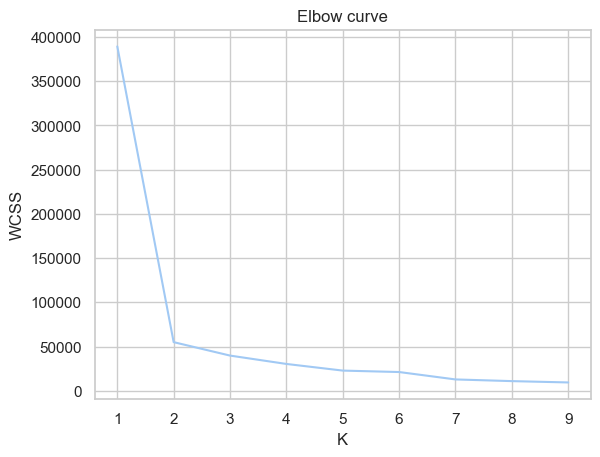

In [83]:
plt.plot(range(1,10),WCSS)
plt.title('Elbow curve')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

Plotting elbow curve using values of sum of squares for different value of K show the curve begins to flatten between 4 and 5. Righnt now i'm using 5 clusters, which creates 5 different clusters using similarities in 3 columns.

In [84]:
kmeans = KMeans(n_clusters = 5,max_iter=300,random_state = 3565)

In [85]:
Y_kmeans= kmeans.fit_predict(L)

In [86]:
Y_kmeans ## Clusters have been created for on groupby dataframe of areacode and state.

array([2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [87]:
df4=df2.groupby(['Area_Code','State']).agg('count').reset_index() ## new dataframe stroing the same areacode and state groupby data.

In [88]:
df4['cluster']=Y_kmeans ## appending cluster column to the dataframe.

In [89]:
df5=pd.merge(df2,df4,on=['Area_Code','State']) ## Merging df2 and df4 on areacode and state would allot cluster to all the rows of df2 dataframe and stroing it as df

In [90]:
data1['cluster']=df5['cluster'] ## now appending cluster coulmn from df5 to original df.

In [91]:
data1.sample(5)

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn,cluster
4323,VT,105,415,409-7971,no,no,0,204.6,111,34.78,134.4,109,11.42,260.8,69,11.74,5.7,7,1.54,1,False.,2
4348,RI,90,510,420-6843,no,no,0,190.0,98,32.30,196.1,111,16.67,216.4,58,9.74,8.0,6,2.16,2,False.,0
1703,DE,96,415,345-3734,no,yes,26,175.8,96,29.89,206.6,84,17.56,178.0,105,8.01,11.1,2,3.00,2,False.,0
1438,ND,60,510,353-9339,no,no,0,203.2,99,34.54,235.8,131,20.04,224.9,112,10.12,15.1,6,4.08,2,False.,4
433,SC,78,415,411-7390,no,no,0,155.0,106,26.35,175.3,101,14.90,155.6,125,7.00,11.8,5,3.19,2,False.,4


# PCA

Applying Dimensionality reduction on all the numerical columns and creating new components.

In [92]:
numerical_cols

['Account_Length',
 'Area_Code',
 'International_Plan',
 'VMail_Plan',
 'VMail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day_Charge',
 'Eve_Mins',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Mins',
 'Night_Calls',
 'Night_Charge',
 'International_Mins',
 'International_Calls',
 'International_Charge',
 'CustServ_Calls']

In [93]:
pca_df=data[['Account_Length',
 'VMail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day_Charge',
 'Eve_Mins',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Mins',
 'Night_Calls',
 'Night_Charge',
 'International_Mins',
 'International_Calls',
 'International_Charge',
 'CustServ_Calls']]

In [94]:
PCA_df=pd.DataFrame(scaler.fit_transform(pca_df))

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(PCA_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5',
                          'principal component 6', 'principal component 7','principal component 8', 'principal component 9','principal component 10',
                          'principal component 11', 'principal component 12','principal component 13', 'principal component 14','principal component 15'])

In [96]:
principalDf.shape

(4617, 15)

In [97]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15
0,-1.520563,1.098949,0.678809,1.927617,0.256535,-0.460580,-1.365778,0.428652,0.493477,-0.826616,-0.135571,0.003074,-0.000692,0.000148,0.000210
1,0.266240,-1.892521,1.260319,1.253650,0.261676,-0.543714,-1.285631,0.028167,1.317773,-0.325067,0.425784,0.001908,0.000434,0.000407,-0.000219
2,-0.878426,1.290554,2.828845,-0.932672,1.078314,-0.971198,-0.426247,-0.948203,-0.144735,0.517124,-0.695959,-0.001526,-0.004838,-0.000419,0.000124
3,-2.039166,3.200912,-0.453037,0.909072,-0.735922,0.120689,1.022557,0.868718,-1.795786,0.155680,0.111662,-0.000030,-0.002705,0.000025,0.000140
4,-0.792618,-0.254861,0.636945,-1.351813,0.384657,1.074771,0.960445,-0.569078,1.638075,0.674692,0.326075,0.000783,0.002684,0.000755,0.000042


In [98]:
churn_df = pd.read_csv(r"C:\Users\prajw\OneDrive\Desktop\no churn data.csv") ## reloading dataset as churn_df to append two pca components to churn and intl. plan and vmail plan columns.

In [99]:
# Manually assign column names
churn_df.columns = [
    "State", "Account_Length", "Area_Code", "Phone", "International_Plan",
    "VMail_Plan", "VMail_Message", "Day_Mins", "Day_Calls", "Day_Charge",
    "Eve_Mins", "Eve_Calls", "Eve_Charge", "Night_Mins", "Night_Calls", "Night_Charge",
    "International_Mins", "International_Calls", "International_Charge", "CustServ_Calls", "Churn"
]

In [100]:
churn_df.dropna(axis=0,how='all',inplace=True)

In [101]:
churn_df = churn_df.reset_index()

In [102]:
new_df=pd.DataFrame(principalDf)

In [103]:
churn_df.head()

,index,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [104]:
new_df['International_Plan']=churn_df['International_Plan']

In [105]:
new_df['VMail_Plan']=churn_df['VMail_Plan']

In [106]:
new_df['cluster']=df5['cluster'] ## appending cluster column to new_df dataframe

In [107]:
pca_features=new_df[['International_Plan','VMail_Plan','cluster',
                     'principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5',
                          'principal component 6', 'principal component 7','principal component 8', 'principal component 9','principal component 10',
                          'principal component 11', 'principal component 12','principal component 13', 'principal component 14','principal component 15'
                     ]]
## creating new variable x for trainingg and tetsing

In [108]:
pca_features = pd.get_dummies(pca_features,columns=['International_Plan','VMail_Plan','cluster'],drop_first=True) 
## creating dummies would convert the categorical columns to numerical by assigning 0 and 1.

In [109]:
pca_features.reset_index

<bound method DataFrame.reset_index of       principal component 1  principal component 2  principal component 3  \
0                 -1.520563               1.098949               0.678809   
1                  0.266240              -1.892521               1.260319   
2                 -0.878426               1.290554               2.828845   
3                 -2.039166               3.200912              -0.453037   
4                 -0.792618              -0.254861               0.636945   
...                     ...                    ...                    ...   
4612               0.172180               0.230336              -0.905519   
4613               3.994951               0.443373               0.935011   
4614               3.029949              -1.080636              -0.938104   
4615               2.322887              -0.154868               1.262700   
4616              -1.120251              -0.170963               2.243188   

      principal component 4  princip

In [110]:
pca_features.sample(4)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,International_Plan_ yes,VMail_Plan_ yes,cluster_1,cluster_2,cluster_3,cluster_4
3776,0.280304,-1.459663,-0.553226,2.078555,-1.704617,-0.791689,0.776862,-0.442479,-1.555801,0.035210,1.351207,-0.002392,0.001453,-0.000006,-0.000218,False,False,False,False,True,False
1045,-2.772540,-1.921699,-0.025312,1.137108,1.257006,1.739495,0.978099,0.008491,1.391102,-0.035570,0.333920,0.001778,-0.001597,0.000332,0.000116,False,False,False,False,True,False
3138,1.661907,-0.209739,1.550760,-1.745122,0.214453,0.871246,-0.650463,-0.982946,-0.352732,-0.740308,0.969389,0.000906,-0.001520,-0.000396,-0.000386,False,False,False,True,False,False
3148,1.377941,0.727672,-0.719342,1.857417,-1.102279,-0.135464,0.431030,-1.373462,1.472452,1.634844,-1.060241,-0.001128,-0.000447,0.000131,-0.000299,True,False,False,False,False,False


In [111]:
pca_target = y

In [112]:
pca_target.sample(5)

4580    0
960     0
4006    0
1119    0
4304    0
Name: Churn, dtype: int32

In [113]:
## Splitting X and Y dataframes into train, test sets using train_test_split
pca_features_train, pca_features_test, pca_target_train, pca_target_test = train_test_split(pca_features,pca_target, test_size=0.30, random_state=42)

Though PCA is meant for Dimensionality Reduction, I'm not really reducing the feature space by eliminating features or combining older onces to create fewer components. Generally we are supposed to drop new pca components which have lower impact on the dependent variable. But, i have decided not to alter the number of columns and created 15 new components using 15 older inputs columns which indeed gave me better predicitons than data with fewer pca components.

In [114]:
importance = RFclf.feature_importances_
# summarize feature importance
x = []
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v*100))

Feature: 0, Score: 2.12276
Feature: 1, Score: 0.37007
Feature: 2, Score: 14.38127
Feature: 3, Score: 2.16258
Feature: 4, Score: 2.92182
Feature: 5, Score: 15.12391
Feature: 6, Score: 2.04093
Feature: 7, Score: 14.57313
Feature: 8, Score: 5.49134
Feature: 9, Score: 1.77514
Feature: 10, Score: 4.83509
Feature: 11, Score: 3.03294
Feature: 12, Score: 2.21163
Feature: 13, Score: 2.84809
Feature: 14, Score: 2.81586
Feature: 15, Score: 3.43617
Feature: 16, Score: 2.97895
Feature: 17, Score: 16.87832


## RnadomForest+PCA+Cluster

In [115]:
rfclf = RandomForestClassifier(n_estimators=300,max_depth=7,min_samples_leaf=5,class_weight='balanced',random_state=42)

In [116]:
rfclf.fit(pca_features_train,pca_target_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       n_estimators=300, random_state=42)

In [117]:
rfclf_Train_pred=rfclf.predict(pca_features_train)

In [118]:
print(classification_report(pca_target_train,rfclf_Train_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2771
           1       0.78      0.77      0.78       460

    accuracy                           0.94      3231
   macro avg       0.87      0.87      0.87      3231
weighted avg       0.94      0.94      0.94      3231



In [119]:
rfclf_Test_pred=rfclf.predict(pca_features_test)

In [120]:
print(classification_report(pca_target_test,rfclf_Test_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1190
           1       0.56      0.63      0.59       196

    accuracy                           0.88      1386
   macro avg       0.75      0.77      0.76      1386
weighted avg       0.88      0.88      0.88      1386



After all the hard work of creating clusters, PCA components and feeding it to RandomForest Classifier have resulted in 1% increase in accuracy on test data compared to that of simple RandomForest calssifier model. Though it's just 1%, model got better in predicting True churn data by 2% on testing data.

Below are the accuracy comaprions of simple RF model and RandomForest model with PCA and Clusters on test data.




In [121]:
print('calssification report of RandomForest Test Model',classification_report(y_test,RFclf_Test_pred))
print('calssification report of CLuster+PCA+RandomForest Test Model',classification_report(pca_target_test,rfclf_Test_pred))

calssification report of RandomForest Test Model               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1190
           1       0.79      0.73      0.76       196

    accuracy                           0.93      1386
   macro avg       0.87      0.85      0.86      1386
weighted avg       0.93      0.93      0.93      1386

calssification report of CLuster+PCA+RandomForest Test Model               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1190
           1       0.56      0.63      0.59       196

    accuracy                           0.88      1386
   macro avg       0.75      0.77      0.76      1386
weighted avg       0.88      0.88      0.88      1386



In [122]:
from sklearn.ensemble import BaggingClassifier

In [123]:
bag = BaggingClassifier(rfclf)

In [124]:
bag.fit(pca_features_train,pca_target_train)

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=7,
                                                   min_samples_leaf=5,
                                                   n_estimators=300,
                                                   random_state=42))

In [125]:
bag_Train_pred=bag.predict(pca_features_train)

In [126]:
print(classification_report(pca_target_train,bag_Train_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2771
           1       0.83      0.72      0.77       460

    accuracy                           0.94      3231
   macro avg       0.89      0.85      0.87      3231
weighted avg       0.94      0.94      0.94      3231



In [127]:
bag_Test_pred=bag.predict(pca_features_test)

In [128]:
print(classification_report(pca_target_test,bag_Test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1190
           1       0.62      0.55      0.58       196

    accuracy                           0.89      1386
   macro avg       0.77      0.75      0.76      1386
weighted avg       0.88      0.89      0.89      1386



Here, we can observe that accuracy after applying bagging is 95% on test data which is similar to that of previous model.
`

To evaluate the performance of the model, Learning curve is plotted.

In [129]:
importance = rfclf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v*100))

Feature: 0, Score: 2.75895
Feature: 1, Score: 8.50211
Feature: 2, Score: 3.66824
Feature: 3, Score: 18.97611
Feature: 4, Score: 3.38008
Feature: 5, Score: 8.36172
Feature: 6, Score: 7.23029
Feature: 7, Score: 4.02869
Feature: 8, Score: 3.12042
Feature: 9, Score: 6.01998
Feature: 10, Score: 3.44845
Feature: 11, Score: 3.84572
Feature: 12, Score: 2.62832
Feature: 13, Score: 2.27455
Feature: 14, Score: 3.13013
Feature: 15, Score: 14.49334
Feature: 16, Score: 3.38690
Feature: 17, Score: 0.11713
Feature: 18, Score: 0.29426
Feature: 19, Score: 0.17142
Feature: 20, Score: 0.16318


In [130]:
from sklearn.model_selection import learning_curve

In [131]:
BAG = BaggingClassifier(rfclf)

In [132]:
train_size, train_scores, test_scores = learning_curve(BAG, pca_features,pca_target,train_sizes=np.linspace(.1, 1.0, 5))

In [133]:
train_size

array([ 369, 1200, 2031, 2862, 3693])

In [134]:
train_scores

array([[0.95392954, 0.93495935, 0.92682927, 0.91056911, 0.92682927],
       [0.9475    , 0.95833333, 0.95916667, 0.955     , 0.9575    ],
       [0.94436238, 0.94239291, 0.93894633, 0.94485475, 0.94190054],
       [0.94234801, 0.94269741, 0.93081761, 0.93885395, 0.93990217],
       [0.93717845, 0.93338749, 0.9255348 , 0.92905497, 0.93555375]])

In [135]:
test_scores

array([[0.85714286, 0.85822511, 0.86023835, 0.85915493, 0.86132178],
       [0.87878788, 0.87554113, 0.87215601, 0.87323944, 0.86565547],
       [0.88636364, 0.87770563, 0.89815818, 0.89599133, 0.88840737],
       [0.88203463, 0.88311688, 0.8992416 , 0.90249187, 0.88840737],
       [0.87554113, 0.88419913, 0.9035753 , 0.89382449, 0.8851571 ]])

In [136]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('f1-score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()

In [137]:
title= 'Performance Learning-Curve RandomForest Bagging Classifier'

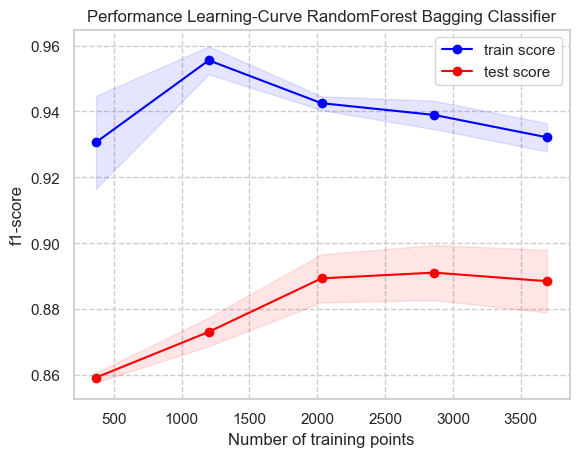

In [138]:
plot_learning_curve(train_size, train_scores, test_scores, title, alpha=0.1)

A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.

The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.

In [139]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfclf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [140]:
grid_search.fit(pca_features_train,pca_target_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=7, min_samples_leaf=5,
                                              n_estimators=300,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [141]:
grid_search.score(pca_features_train,pca_target_train)

0.9851439182915506

In [142]:
grid_search.score(pca_features_test,pca_target_test)

0.8932178932178932

With Grid Search, after tuning hyper parameters the accuracy is recorded as 89% i.e increased by 1%
